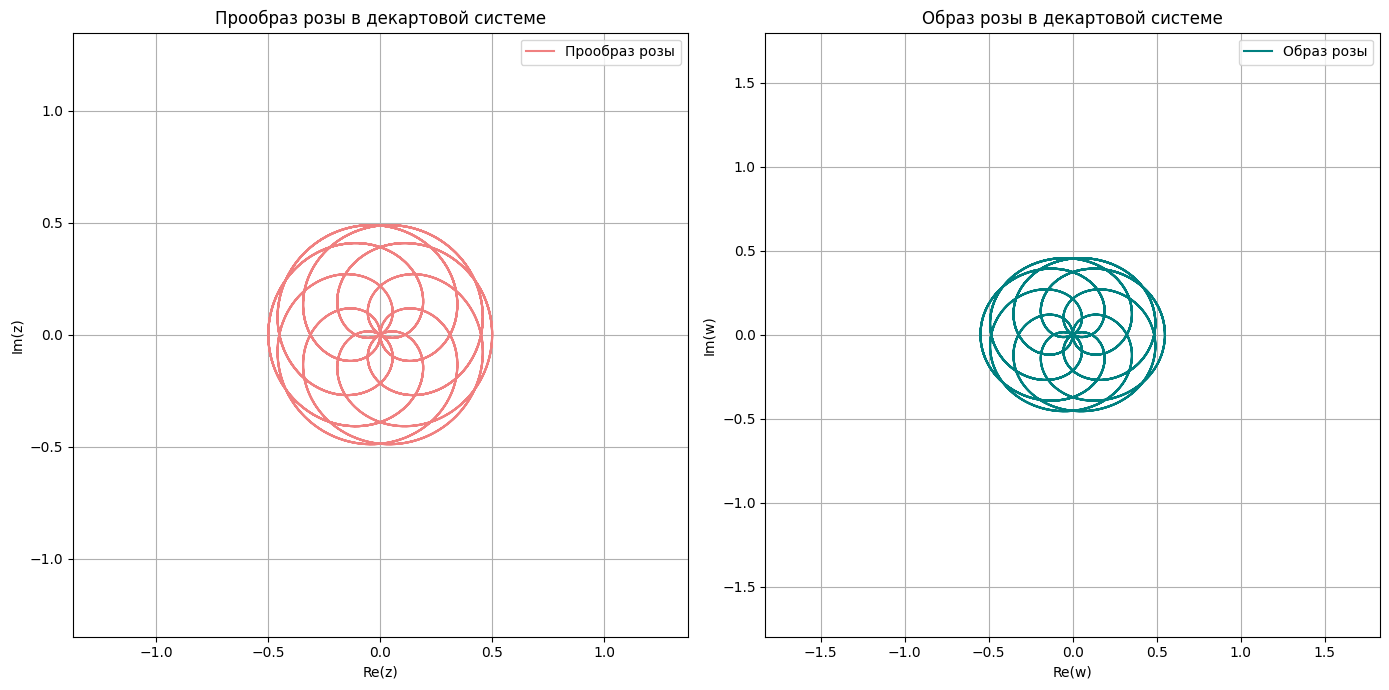

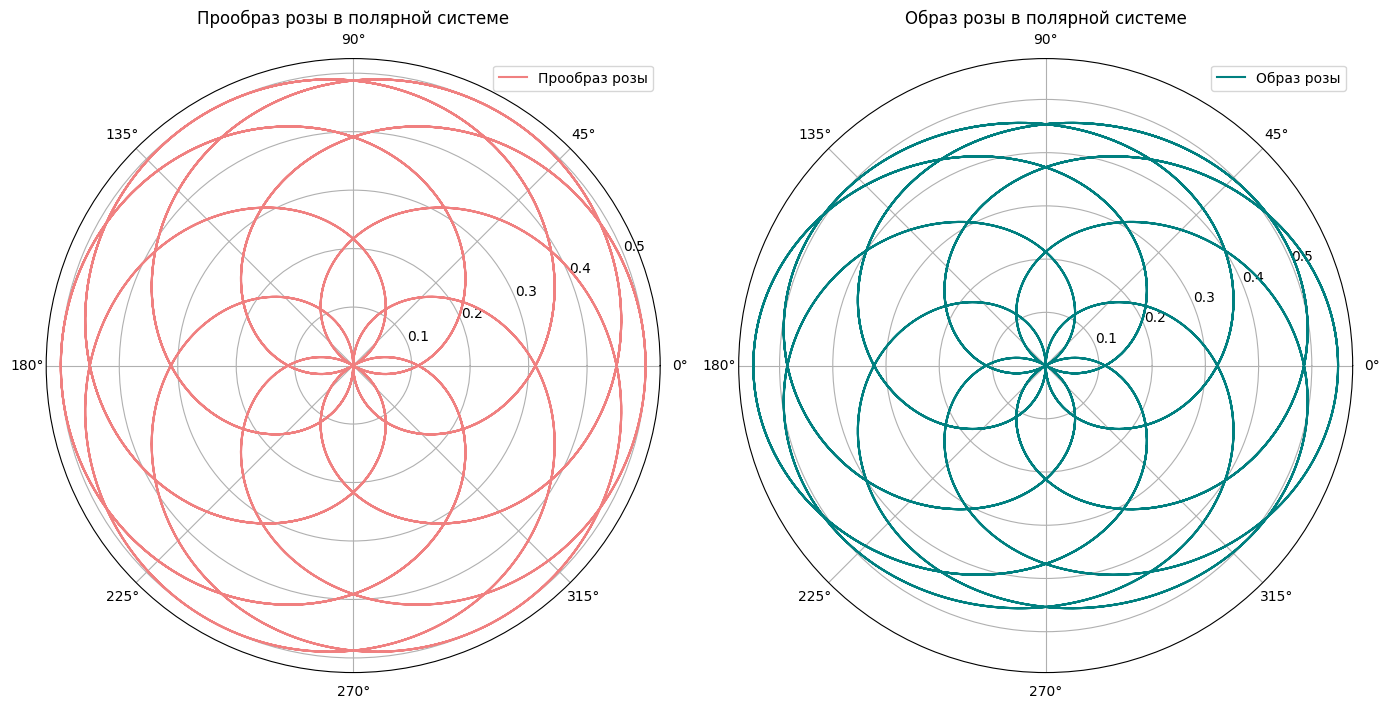

In [3]:
import numpy as np
import matplotlib.pyplot as plt
alpha = 0.5
beta = 3 / 7

def rose(t, alpha, beta):
    return alpha * np.abs(np.cos(beta * t))

t = np.linspace(0, 50 * np.pi, 50000)
z = rose(t, alpha, beta) * np.exp(1j * t)

def f(z):
    return np.arctanh(z)

w = f(z)

plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.plot(z.real, z.imag, label='Прообраз розы', color='lightcoral')
plt.xlabel('Re(z)')
plt.ylabel('Im(z)')
plt.title('Прообраз розы в декартовой системе')
plt.legend()
plt.axis('equal')
plt.grid(True)
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)

plt.subplot(1, 2, 2)
plt.plot(w.real, w.imag, label='Образ розы', color='teal')
plt.xlabel('Re(w)')
plt.ylabel('Im(w)')
plt.title('Образ розы в декартовой системе')
plt.legend()
plt.axis('equal')
plt.grid(True)
plt.xlim(-2, 2)
plt.ylim(-2, 2)

plt.tight_layout()
plt.show()

theta_z = np.angle(z)
rho_z = np.abs(z)

theta_w = np.angle(w)
rho_w = np.abs(w)

fig, ax = plt.subplots(1, 2, subplot_kw={'projection': 'polar'}, figsize=(14, 7))

ax[0].plot(theta_z, rho_z, label='Прообраз розы', color='lightcoral')
ax[0].set_title('Прообраз розы в полярной системе')
ax[0].legend()
ax[0].grid(True)

ax[1].plot(theta_w, rho_w, label='Образ розы', color='teal')
ax[1].set_title('Образ розы в полярной системе')
ax[1].legend()
ax[1].grid(True)

plt.tight_layout()
plt.show()

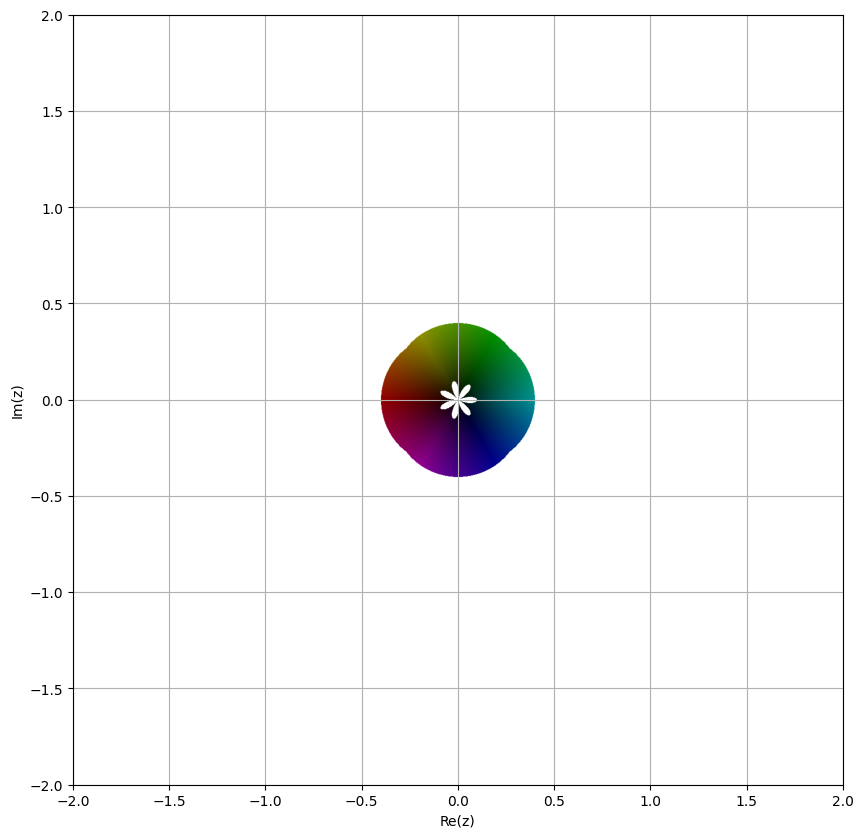

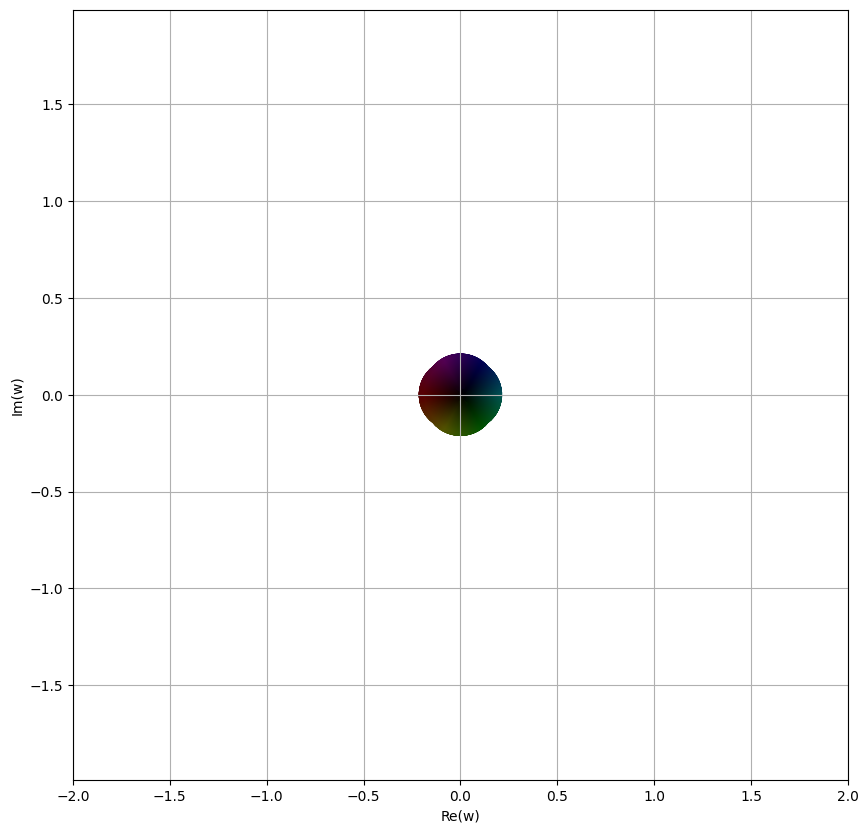

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

def hsl_coloring(z, a=1):
    h = np.angle(z) / (2 * np.pi) + 0.5
    s = np.ones_like(z, dtype=float)
    l = (np.abs(z)**a) / (np.abs(z)**a + 1)
    return np.dstack((h, s, l)).astype(float)

def to_rgb(hsl):
    h, s, l = hsl[..., 0], hsl[..., 1], hsl[..., 2]
    c = (1 - np.abs(2 * l - 1)) * s
    x = c * (1 - np.abs(np.mod(h * 6, 2) - 1))
    m = l - c / 2

    rgb = np.zeros(hsl.shape, dtype=float)

    h = h * 6
    i = (h < 1)
    rgb[i] = np.dstack((c[i], x[i], np.zeros_like(c[i]))) + m[i][..., None]

    i = (1 <= h) & (h < 2)
    rgb[i] = np.dstack((x[i], c[i], np.zeros_like(c[i]))) + m[i][..., None]

    i = (2 <= h) & (h < 3)
    rgb[i] = np.dstack((np.zeros_like(c[i]), c[i], x[i])) + m[i][..., None]

    i = (3 <= h) & (h < 4)
    rgb[i] = np.dstack((np.zeros_like(c[i]), x[i], c[i])) + m[i][..., None]

    i = (4 <= h) & (h < 5)
    rgb[i] = np.dstack((x[i], np.zeros_like(c[i]), c[i])) + m[i][..., None]

    i = (5 <= h) & (h < 6)
    rgb[i] = np.dstack((c[i], np.zeros_like(c[i]), x[i])) + m[i][..., None]

    rgb += m[..., None]
    rgb = np.clip(rgb, 0, 1)
    return rgb

alpha1, beta1, alpha2, beta2 = 0.1, 7/2, 0.4, 2/5
grid_size = 1500
x = np.linspace(-2, 2, grid_size)
y = np.linspace(-2, 2, grid_size)
X, Y = np.meshgrid(x, y)
Z = X + 1j * Y

R = np.abs(Z)
Arg = np.angle(Z)
max_cos1 = np.abs(np.cos(beta1 * (Arg + 2 * np.pi * np.arange(-10, 11)[:, None, None]))).max(axis=0)
max_cos2 = np.abs(np.cos(beta2 * (Arg + 2 * np.pi * np.arange(-10, 11)[:, None, None]))).max(axis=0)
mask = (alpha1 * max_cos1 <= R) & (R <= alpha2 * max_cos2)

hsl = hsl_coloring(Z)
rgb = to_rgb(hsl)
rgb[~mask] = 1

plt.figure(figsize=(10, 10))
plt.imshow(rgb, extent=[-2, 2, -2, 2])
plt.xlabel('Re(z)')
plt.ylabel('Im(z)')
plt.grid(True)
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.show()

def inverse_conformal_map(w):
    return np.arcsin((1j * w) / 2)

def conformal_map(z):
    return np.arcsin(1j * z / 2)

Z_masked = Z[mask]
W = inverse_conformal_map(Z_masked)

hsl_w = hsl_coloring(W)
rgb_w = to_rgb(hsl_w)

W_direct = conformal_map(Z_masked)

plt.figure(figsize=(10, 10))
plt.scatter(W_direct.real, W_direct.imag, color=rgb_w.reshape(-1, 3), marker='.')
plt.xlabel('Re(w)')
plt.ylabel('Im(w)')
plt.axis('equal')
plt.grid(True)
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.show()